# Interactive Plots

## Aproach 1

Using **matplotlib** and refreshing entire plot. It seems to be slow.

In [21]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import collections
import numpy as np
#%matplotlib inline

def live_plot(data_dict, figsize=(7,5), title=''):
    #clear_output(wait=True)
    plt.figure(figsize=figsize)
    for label,data in data_dict.items():
        plt.plot(data, label=label)
    plt.title(title)
    plt.grid(True)
    plt.xlabel('epoch')
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show();

In [ ]:
data = collections.defaultdict(list)
for i in range(100):
    data['foo'].append(np.random.random())
    data['bar'].append(np.random.random())
    data['baz'].append(np.random.random())
    live_plot(data)

## Aproach 2

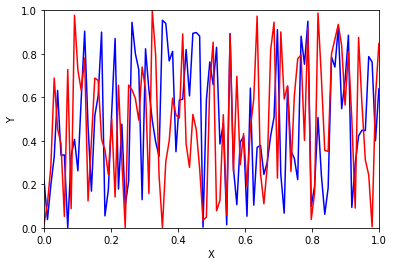

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import time

def pltsin(ax, colors=['b']):
    x = np.linspace(0,1,100)
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            y = np.random.random(size=(100,1))
            line.set_ydata(y)
    else:
        for color in colors:
            y = np.random.random(size=(100,1))
            ax.plot(x, y, color)
    fig.canvas.draw()

fig,ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,1)
ax.set_ylim(0,1)

for f in range(5):
    pltsin(ax, ['b', 'r'])
    time.sleep(1)

## Aproach 3

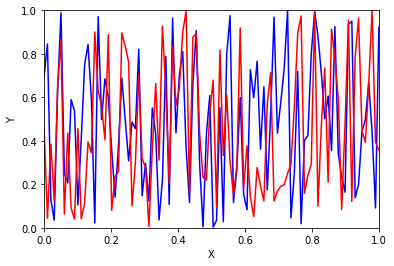

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import time

from IPython import display

def pltsin(ax, *,hdisplay, colors=['b']):
    x = np.linspace(0,1,100)
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            y = np.random.random(size=(100,1))
            line.set_ydata(y)
    else:
        for color in colors:
            y = np.random.random(size=(100,1))
            ax.plot(x, y, color)
    hdisplay.update(fig)


fig,ax = plt.subplots(1,1)
hdisplay = display.display("", display_id=True)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,1)
ax.set_ylim(0,1)


for f in range(50):
    pltsin(ax, colors=['b', 'r'], hdisplay=hdisplay)
    #time.sleep(1)
    
plt.close(fig)

## Aproach 4

In [ ]:
import random
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.style.use('fivethirtyeight')

x_vals = []
y_vals = []

index = count()


def animate(i):
    data = pd.read_csv('data.csv')
    x = data['x_value']
    y1 = data['total_1']
    y2 = data['total_2']

    plt.cla()

    plt.plot(x, y1, label='Channel 1')
    plt.plot(x, y2, label='Channel 2')

    plt.legend(loc='upper left')
    plt.tight_layout()


ani = FuncAnimation(plt.gcf(), animate, interval=1000)

plt.tight_layout()
plt.show()


## Aproach 5 Bokeh

In [ ]:
!jupyter labextension install @jupyter-widgets/jupyterlab-manager
!jupyter labextension install @bokeh/jupyter_bokeh

# Can't install. Requires nodejs>=12

In [1]:
from bokeh.plotting import curdoc, figure, show
from bokeh.io import output_notebook
import random
import time

def update():
    global i
    temp_y = random.random()
    r.data_source.stream({'x': [i], 'y': [temp_y]})
    i += 1


    
i = 0
p = figure()
r = p.circle([], [])
curdoc().add_root(p)

output_notebook()
show(p)




Loading BokehJS ...

In [2]:
curdoc().add_periodic_callback(update, 100)

## Aproach 6

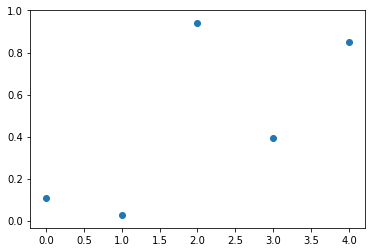

In [33]:
import matplotlib.pyplot as plt
from drawnow import drawnow
import numpy as np

def makeFig():
    plt.scatter(xList,yList) # I think you meant this

plt.ion() # enable interactivity
fig=plt.figure() # make a figure

xList=list()
yList=list()

for i in np.arange(5):
    y=np.random.random()
    xList.append(i)
    yList.append(y)
    clear_output(wait=True)
    drawnow(makeFig)
    #makeFig()      The drawnow(makeFig) command can be replaced
    #plt.draw()     with makeFig(); plt.draw()
    #plt.pause(0.001)

# Aproach 7

Try with canvas <https://blog.jupyter.org/ipycanvas-a-python-canvas-for-jupyter-bbb51e4777f7>